In [1]:
import pandas as pd

In [2]:
ground_truth = pd.read_csv("./benchmark_desc.csv")
ground_truth.head(10)

,nb_name,eid,ename,evalue,traceback,label_root_cause,label_refined_exp_type,label_ML_pipeline,label_if_ML_bug,DatasetTitle_1,DatasetTitle_2,DatasetLicenseName_1,DatasetLicenseName_2,DatasetUrl_1,DatasetUrl_2,NotebookUrl
0,NBspecific_1,dac09c73-577f-3d5d-834b-45942405eabb,nameerror,name 'tf_idf' is not defined,['--------------------------------------------...,NB specific,variable not found,data preparation,ML bug,IMDB Dataset of 50K Movie Reviews,NaN,Allow academic research,NaN,https://www.kaggle.com/datasets/lakshmi25npath...,NaN,https://www.kaggle.com/code/pradeepparida/imdb...
1,NBspecific_2,86d3fc43-5a6a-3e80-94ef-e82ea833017b,nameerror,name 'X_train' is not defined,['--------------------------------------------...,NB specific,variable not found,training,ML bug,Fashion MNIST,NaN,MIT,NaN,https://www.kaggle.com/datasets/zalando-resear...,NaN,https://www.kaggle.com/code/salomonokn/exercic...
2,NBspecific_3,698da925-8121-3961-92ac-9445e54cad54,valueerror,operands could not be broadcast together with ...,['--------------------------------------------...,NB specific,unsupported broadcast,evaluation/prediction,ML bug,mywordle_data,NaN,Unknown,NaN,https://www.kaggle.com/datasets/dhuwly/mywordl...,NaN,https://www.kaggle.com/code/senorisky/mcm2023-...
3,NBspecific_4,f69e2754-c8c7-3e98-9f18-494fc9674d4d,nameerror,name 'sns' is not defined,['--------------------------------------------...,NB specific,module not found,data visualization,ML bug,German Credit Risk - With Target,NaN,CC0: Public Domain,NaN,https://www.kaggle.com/datasets/kabure/german-...,NaN,https://www.kaggle.com/code/diegoeliascosta/mg...
4,NBspecific_5,1ca74ad2-3814-3ec8-add0-17046e7be5ae,keyerror,"""['num_outbound_cmds'] not found in axis""",['--------------------------------------------...,NB specific,key error,data preparation,ML bug,NSL-KDD,NaN,Unknown,NaN,https://www.kaggle.com/datasets/kiranmahesh/ns...,NaN,https://www.kaggle.com/code/rafik1992/attacks-...
5,NBspecific_6,a4bec0b5-5bfe-35ed-8f24-eebeb07b1e4b,nameerror,name 'history' is not defined,----------------------------------------------...,NB specific,variable not found,evaluation/prediction,ML bug,Bitcoin Limit Order Book (LOB) Data,NaN,GPL 2,NaN,https://www.kaggle.com/datasets/siavashraz/bit...,NaN,https://www.kaggle.com/code/siavashraz/implmen...
6,NBspecific_7,f7c4f578-8411-3c44-b3a3-08301d1c4216,keyerror,%percent emission',['--------------------------------------------...,NB specific,key error,data visualization,ML bug,Global Emissions.,NaN,CC0: Public Domain,NaN,https://www.kaggle.com/datasets/ashishraut64/g...,NaN,https://www.kaggle.com/code/varshajais123/glob...
7,NBspecific_8,3517dfa8-7421-3564-ba41-65b343e95418,keyerror,'Amount',['--------------------------------------------...,NB specific,key error,data preparation,ML bug,Credit Card Fraud Detection,NaN,"Database: Open Database, Contents: Database Co...",NaN,https://www.kaggle.com/datasets/mlg-ulb/credit...,NaN,https://www.kaggle.com/code/aloksingh00001/fra...
8,NBspecific_9,57b33894-a3e2-3e0a-9d5e-be7f993cdee9,keyerror,'[10472] not found in axis',['--------------------------------------------...,NB specific,key error,data preparation,ML bug,Google Play Store Apps,NaN,Unknown,NaN,https://www.kaggle.com/datasets/lava18/google-...,NaN,https://www.kaggle.com/code/nithyak7/google-pl...
9,NBspecific_10,6b1b4ed3-15c6-3c41-8afc-b6920d23d305,indexerror,"only integers, slices (`:`), ellipsis (`...`),...",['--------------------------------------------...,NB specific,index error,data preparation,ML bug,Wind Power Forecasting,NaN,CC0: Public Domain,NaN,https://www.kaggle.com/datasets/theforcecoder/...,NaN,https://www.kaggle.com/code/anand1994sp/wind-e...


In [3]:
ground_truth = ground_truth[["nb_name", "label_root_cause", "label_refined_exp_type"]]
ground_truth.head(5)

,nb_name,label_root_cause,label_refined_exp_type
0,NBspecific_1,NB specific,variable not found
1,NBspecific_2,NB specific,variable not found
2,NBspecific_3,NB specific,unsupported broadcast
3,NBspecific_4,NB specific,module not found
4,NBspecific_5,NB specific,key error


In [4]:
extension_results = pd.read_csv("./bug_summary_without_analysis.csv")
extension_results.head(10)

,filename,file_id,buggy_or_not,major_bug,root_cause
0,NBspecific_11_reproduced.json,NBspecific_11_reproduced,Yes,Type error,"NB specific, because the `plt.imshow` function..."
1,numpy_7_reproduced.json,numpy_7_reproduced,Yes,Tensor shape mismatch,"API misuse, because the `np.moveaxis` calls in..."
2,NBspecific_6_reproduced.json,NBspecific_6_reproduced,Yes,Index error,"Data confusion, because the `Index error` is c..."
3,pandas_9_reproduced.json,pandas_9_reproduced,Yes,Key Error,"Data confusion, because the code attempted to ..."
4,numpy_10_reproduced.json,numpy_10_reproduced,Yes,Value Error,"API misuse, because `np.random.choice` was use..."
5,NBspecific_9_reproduced.json,NBspecific_9_reproduced,Yes,Key Error,NB specific: The `KeyError` occurs because the...
6,sklearn_2_reproduced.json,sklearn_2_reproduced,Yes,Variable Not Found,"Data confusion: Variables like `df_encoded`, `..."
7,pandas_6_reproduced.json,pandas_6_reproduced,Yes,Value Error,Data confusion because the 'Order ID' column c...
8,tensorflow_4_reproduced.json,tensorflow_4_reproduced,Yes,Tensor shape mismatch,"ML model confusion, because the user configure..."
9,numpy_8_reproduced.json,numpy_8_reproduced,Yes,Type error,"API misuse, because the `gp.PrimitiveSet` was ..."


In [5]:
extension_results["file_id"] = extension_results["file_id"].str.replace("_reproduced", "", regex=False)
extension_results.head(5)


,filename,file_id,buggy_or_not,major_bug,root_cause
0,NBspecific_11_reproduced.json,NBspecific_11,Yes,Type error,"NB specific, because the `plt.imshow` function..."
1,numpy_7_reproduced.json,numpy_7,Yes,Tensor shape mismatch,"API misuse, because the `np.moveaxis` calls in..."
2,NBspecific_6_reproduced.json,NBspecific_6,Yes,Index error,"Data confusion, because the `Index error` is c..."
3,pandas_9_reproduced.json,pandas_9,Yes,Key Error,"Data confusion, because the code attempted to ..."
4,numpy_10_reproduced.json,numpy_10,Yes,Value Error,"API misuse, because `np.random.choice` was use..."


In [6]:
extension_results.shape

(103, 5)

## Merge datasets for analysis

In [7]:
merged_df = ground_truth.merge(
    extension_results,
    left_on="nb_name",
    right_on="file_id",
    how="inner"
)
merged_df.head(5)


,nb_name,label_root_cause,label_refined_exp_type,filename,file_id,buggy_or_not,major_bug,root_cause
0,NBspecific_1,NB specific,variable not found,NBspecific_1_reproduced.json,NBspecific_1,Yes,Variable Not Found,"NB specific, because the cell defining the `tf..."
1,NBspecific_2,NB specific,variable not found,NBspecific_2_reproduced.json,NBspecific_2,Yes,Variable Not Found,"NB specific, because the `X_train` variable wa..."
2,NBspecific_3,NB specific,unsupported broadcast,NBspecific_3_reproduced.json,NBspecific_3,Yes,Value Error,"Data confusion, because the `yFit` variable co..."
3,NBspecific_4,NB specific,module not found,NBspecific_4_reproduced.json,NBspecific_4,Yes,Variable Not Found,NB specific because the variable `sns` was not...
4,NBspecific_6,NB specific,variable not found,NBspecific_6_reproduced.json,NBspecific_6,Yes,Index error,"Data confusion, because the `Index error` is c..."


In [8]:
merged_df = merged_df.drop(columns=["file_id"])

In [9]:
merged_df.shape

(103, 7)

## Analysis

In [10]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
from sklearn.metrics import confusion_matrix, roc_curve, auc, precision_recall_curve, classification_report
from IPython.display import display, Markdown
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import label_binarize

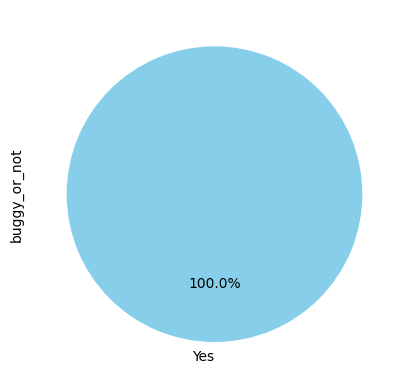

In [11]:
answer_counts = merged_df['buggy_or_not'].value_counts()
answer_counts.plot(kind='pie', autopct='%1.1f%%', colors=['skyblue', 'salmon'], startangle=90)
plt.show()

In [12]:
# Select relevant columns and drop rows with missing values
eval_df = merged_df[["label_refined_exp_type", "major_bug"]].dropna()

# Convert both columns to lowercase (and strip whitespace for safety)
y_true = eval_df["label_refined_exp_type"].str.lower().str.strip()
y_pred = eval_df["major_bug"].str.lower().str.strip()

# Generate classification report
report = classification_report(y_true, y_pred)

print(report)

                            precision    recall  f1-score   support

           attribute error       1.00      0.57      0.73         7
      data value violation       0.00      0.00      0.00         7
     feature name mismatch       1.00      1.00      1.00         2
               index error       0.86      0.75      0.80         8
          invalid argument       0.00      0.00      0.00        18
                  io error       0.00      0.00      0.00         1
                 key error       1.00      1.00      1.00         9
model initialization error       0.00      0.00      0.00         1
          module not found       0.00      0.00      0.00         3
             runtime error       0.43      1.00      0.60         3
     tensor shape mismatch       0.50      0.36      0.42        14
                type error       0.15      0.50      0.24         4
     unsupported broadcast       0.00      0.00      0.00         5
               value error       0.31      0.82

/Users/oluwadabiraomotoso/miniconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/oluwadabiraomotoso/miniconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/oluwadabiraomotoso/miniconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.cap

In [13]:
pd.crosstab(y_true, y_pred)

major_bug,attribute error,feature name mismatch,index error,invalid argument,key error,model initialization error,runtime error,tensor shape mismatch,type error,value error,variable not found
label_refined_exp_type,,,,,,,,,,,
attribute error,4,0,0,0,0,0,0,0,0,1,2
data value violation,0,0,0,0,0,0,0,0,0,7,0
feature name mismatch,0,2,0,0,0,0,0,0,0,0,0
index error,0,0,6,0,0,0,0,0,0,0,2
invalid argument,0,0,0,0,0,0,0,3,9,4,2
io error,0,0,0,1,0,0,0,0,0,0,0
key error,0,0,0,0,9,0,0,0,0,0,0
model initialization error,0,0,0,0,0,0,0,0,0,0,1
module not found,0,0,0,0,0,0,0,0,0,0,3


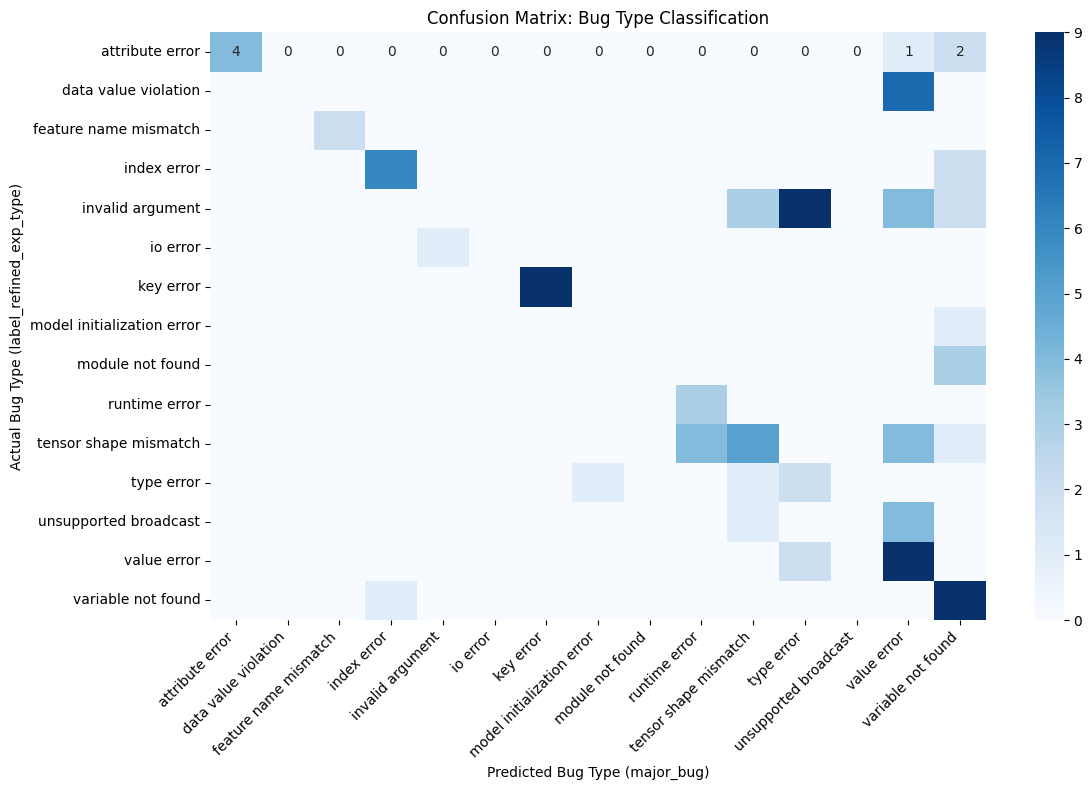

In [14]:
# Make sure your labels are lowercase and stripped
merged_df['label_refined_exp_type'] = merged_df['label_refined_exp_type'].str.lower().str.strip()
merged_df['major_bug'] = merged_df['major_bug'].str.lower().str.strip()

# Get all unique labels from both columns to ensure the confusion matrix is square
labels = sorted(set(merged_df['label_refined_exp_type']) | set(merged_df['major_bug']))

# Compute confusion matrix with fixed label order
conf_matrix_bug = confusion_matrix(
    merged_df['label_refined_exp_type'],
    merged_df['major_bug'],
    labels=labels
)

# Convert to DataFrame for nicer display
cm_df = pd.DataFrame(conf_matrix_bug, index=labels, columns=labels)

# Plot confusion matrix as heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(cm_df, annot=True, fmt="d", cmap="Blues",
            xticklabels=labels, yticklabels=labels)

plt.xlabel("Predicted Bug Type (major_bug)")
plt.ylabel("Actual Bug Type (label_refined_exp_type)")
plt.title("Confusion Matrix: Bug Type Classification")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Save figure
plt.savefig('BugTypeClassification.png', bbox_inches='tight')
plt.show()

In [15]:
# Base root cause phrases
base_root_causes = [
    "API misuse",
    "data confusion",
    "NB specific",
    "implementation error",
    "ML model confusion",
    "library cause"
]

# Function to map long explanation to base phrase
def map_root_cause(text):
    text_lower = str(text).lower()  # normalize
    for phrase in base_root_causes:
        if phrase.lower() in text_lower:
            return phrase  # return the matched base phrase
    return "other"  # fallback if no base phrase found


In [16]:
merged_df['root_cause_mapped'] = merged_df['root_cause'].apply(map_root_cause)
merged_df['label_root_cause'] = merged_df['label_root_cause'].str.strip()  # clean ground truth


In [17]:
y_true = merged_df['label_root_cause']
y_pred = merged_df['root_cause_mapped']

# Include all base phrases plus fallback
labels = base_root_causes + ["other"]

In [18]:
print(classification_report(y_true, y_pred, labels=labels, zero_division=0))

                      precision    recall  f1-score   support

          API misuse       0.59      0.64      0.61        42
      data confusion       0.29      0.22      0.25        23
         NB specific       1.00      0.74      0.85        19
implementation error       0.27      0.38      0.32        16
  ML model confusion       0.25      0.50      0.33         2
       library cause       0.00      0.00      0.00         1
               other       0.00      0.00      0.00         0

            accuracy                           0.51       103
           macro avg       0.34      0.35      0.34       103
        weighted avg       0.54      0.51      0.52       103



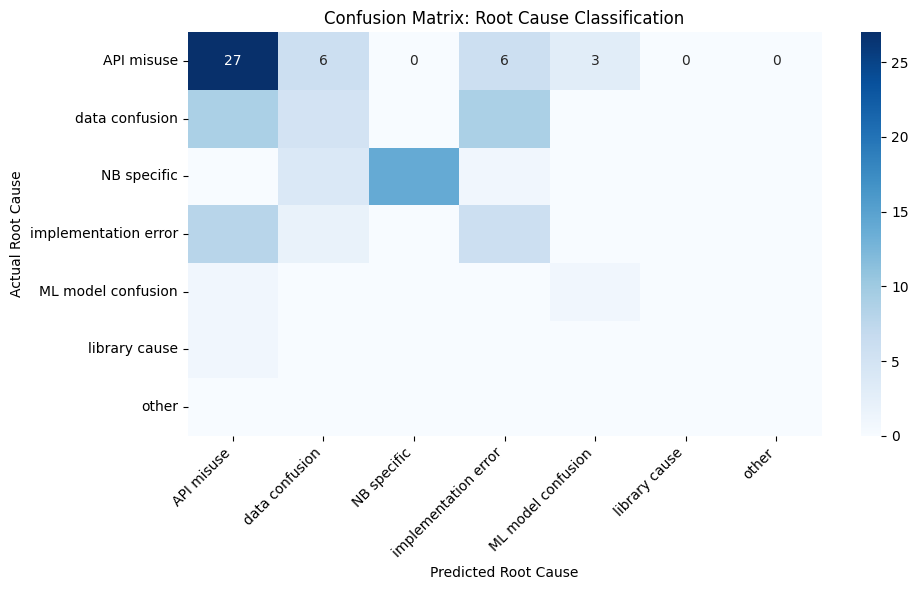

In [19]:
cm = confusion_matrix(y_true, y_pred, labels=labels)
cm_df = pd.DataFrame(cm, index=labels, columns=labels)

plt.figure(figsize=(10, 6))
sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted Root Cause")
plt.ylabel("Actual Root Cause")
plt.title("Confusion Matrix: Root Cause Classification")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('RootCauseClassification.png', bbox_inches='tight')
plt.show()

In [20]:
failed_errors = pd.read_csv("./failed_retry_copy.csv")
failed_errors.head(10)

,notebook_path,timestamp,error_type,error_message,clean_error_name,clean_error_message
0,/junobench_env/pandas_6/pandas_6_extension.ipynb,2026-01-14T15:43:56.449464,CellExecutionError,An error occurred while executing the followin...,KeyError,"None of [Index(['Order ID', 'Quantity Ordered'..."
1,/junobench_env/pandas_1/pandas_1_extension.ipynb,2026-01-14T15:48:04.013501,DeadKernelError,Kernel died,NaN,NaN
2,/junobench_env/sklearn_10/sklearn_10_extension...,2026-01-14T15:56:35.444530,CellExecutionError,An error occurred while executing the followin...,AttributeError,module 'numpy' has no attribute 'bool'.
3,/junobench_env/pandas_8/pandas_8_extension.ipynb,2026-01-14T15:57:05.522537,CellExecutionError,An error occurred while executing the followin...,ValueError,"Unable to parse string ""$36,945 "" at position 0"
4,/junobench_env/torch_11/torch_11_extension.ipynb,2026-01-14T15:58:51.012140,CellExecutionError,An error occurred while executing the followin...,KeyError,'_unk_'
5,/junobench_env/sklearn_11/sklearn_11_extension...,2026-01-14T15:59:04.362724,CellExecutionError,An error occurred while executing the followin...,NameError,name 'x' is not defined
6,/junobench_env/pandas_7/pandas_7_extension.ipynb,2026-01-14T15:59:21.456867,CellExecutionError,An error occurred while executing the followin...,ValueError,could not convert string to float: 'D/Generati...
7,/junobench_env/numpy_9/numpy_9_extension.ipynb,2026-01-14T15:59:41.776840,CellExecutionError,An error occurred while executing the followin...,FileNotFoundError,[Errno 2] No such file or directory: '../input...
8,/junobench_env/sklearn_4/sklearn_4_extension.i...,2026-01-14T16:28:32.924069,CellTimeoutError,"A cell timed out while it was being executed, ...",NaN,NaN
9,/junobench_env/numpy_7/numpy_7_extension.ipynb,2026-01-14T16:31:36.855604,CellExecutionError,An error occurred while executing the followin...,ValueError,can only convert an array of size 1 to a Pytho...


In [21]:
failed_errors = failed_errors.dropna(subset=["clean_error_name", "clean_error_message"])
failed_errors.head(5)

,notebook_path,timestamp,error_type,error_message,clean_error_name,clean_error_message
0,/junobench_env/pandas_6/pandas_6_extension.ipynb,2026-01-14T15:43:56.449464,CellExecutionError,An error occurred while executing the followin...,KeyError,"None of [Index(['Order ID', 'Quantity Ordered'..."
2,/junobench_env/sklearn_10/sklearn_10_extension...,2026-01-14T15:56:35.444530,CellExecutionError,An error occurred while executing the followin...,AttributeError,module 'numpy' has no attribute 'bool'.
3,/junobench_env/pandas_8/pandas_8_extension.ipynb,2026-01-14T15:57:05.522537,CellExecutionError,An error occurred while executing the followin...,ValueError,"Unable to parse string ""$36,945 "" at position 0"
4,/junobench_env/torch_11/torch_11_extension.ipynb,2026-01-14T15:58:51.012140,CellExecutionError,An error occurred while executing the followin...,KeyError,'_unk_'
5,/junobench_env/sklearn_11/sklearn_11_extension...,2026-01-14T15:59:04.362724,CellExecutionError,An error occurred while executing the followin...,NameError,name 'x' is not defined


In [22]:
failed_errors.shape

(76, 6)

In [23]:
failed_errors["file_id"] = (
    failed_errors["notebook_path"]
    .str.split("/")
    .str[-1]
    .str.replace(".ipynb", "", regex=False)
    .str.replace("_extension", "", regex=False)
)
failed_errors.head(5)

,notebook_path,timestamp,error_type,error_message,clean_error_name,clean_error_message,file_id
0,/junobench_env/pandas_6/pandas_6_extension.ipynb,2026-01-14T15:43:56.449464,CellExecutionError,An error occurred while executing the followin...,KeyError,"None of [Index(['Order ID', 'Quantity Ordered'...",pandas_6
2,/junobench_env/sklearn_10/sklearn_10_extension...,2026-01-14T15:56:35.444530,CellExecutionError,An error occurred while executing the followin...,AttributeError,module 'numpy' has no attribute 'bool'.,sklearn_10
3,/junobench_env/pandas_8/pandas_8_extension.ipynb,2026-01-14T15:57:05.522537,CellExecutionError,An error occurred while executing the followin...,ValueError,"Unable to parse string ""$36,945 "" at position 0",pandas_8
4,/junobench_env/torch_11/torch_11_extension.ipynb,2026-01-14T15:58:51.012140,CellExecutionError,An error occurred while executing the followin...,KeyError,'_unk_',torch_11
5,/junobench_env/sklearn_11/sklearn_11_extension...,2026-01-14T15:59:04.362724,CellExecutionError,An error occurred while executing the followin...,NameError,name 'x' is not defined,sklearn_11


In [24]:
ground_truth = pd.read_csv("./benchmark_desc.csv")
ground_truth.head(10)

,nb_name,eid,ename,evalue,traceback,label_root_cause,label_refined_exp_type,label_ML_pipeline,label_if_ML_bug,DatasetTitle_1,DatasetTitle_2,DatasetLicenseName_1,DatasetLicenseName_2,DatasetUrl_1,DatasetUrl_2,NotebookUrl
0,NBspecific_1,dac09c73-577f-3d5d-834b-45942405eabb,nameerror,name 'tf_idf' is not defined,['--------------------------------------------...,NB specific,variable not found,data preparation,ML bug,IMDB Dataset of 50K Movie Reviews,NaN,Allow academic research,NaN,https://www.kaggle.com/datasets/lakshmi25npath...,NaN,https://www.kaggle.com/code/pradeepparida/imdb...
1,NBspecific_2,86d3fc43-5a6a-3e80-94ef-e82ea833017b,nameerror,name 'X_train' is not defined,['--------------------------------------------...,NB specific,variable not found,training,ML bug,Fashion MNIST,NaN,MIT,NaN,https://www.kaggle.com/datasets/zalando-resear...,NaN,https://www.kaggle.com/code/salomonokn/exercic...
2,NBspecific_3,698da925-8121-3961-92ac-9445e54cad54,valueerror,operands could not be broadcast together with ...,['--------------------------------------------...,NB specific,unsupported broadcast,evaluation/prediction,ML bug,mywordle_data,NaN,Unknown,NaN,https://www.kaggle.com/datasets/dhuwly/mywordl...,NaN,https://www.kaggle.com/code/senorisky/mcm2023-...
3,NBspecific_4,f69e2754-c8c7-3e98-9f18-494fc9674d4d,nameerror,name 'sns' is not defined,['--------------------------------------------...,NB specific,module not found,data visualization,ML bug,German Credit Risk - With Target,NaN,CC0: Public Domain,NaN,https://www.kaggle.com/datasets/kabure/german-...,NaN,https://www.kaggle.com/code/diegoeliascosta/mg...
4,NBspecific_5,1ca74ad2-3814-3ec8-add0-17046e7be5ae,keyerror,"""['num_outbound_cmds'] not found in axis""",['--------------------------------------------...,NB specific,key error,data preparation,ML bug,NSL-KDD,NaN,Unknown,NaN,https://www.kaggle.com/datasets/kiranmahesh/ns...,NaN,https://www.kaggle.com/code/rafik1992/attacks-...
5,NBspecific_6,a4bec0b5-5bfe-35ed-8f24-eebeb07b1e4b,nameerror,name 'history' is not defined,----------------------------------------------...,NB specific,variable not found,evaluation/prediction,ML bug,Bitcoin Limit Order Book (LOB) Data,NaN,GPL 2,NaN,https://www.kaggle.com/datasets/siavashraz/bit...,NaN,https://www.kaggle.com/code/siavashraz/implmen...
6,NBspecific_7,f7c4f578-8411-3c44-b3a3-08301d1c4216,keyerror,%percent emission',['--------------------------------------------...,NB specific,key error,data visualization,ML bug,Global Emissions.,NaN,CC0: Public Domain,NaN,https://www.kaggle.com/datasets/ashishraut64/g...,NaN,https://www.kaggle.com/code/varshajais123/glob...
7,NBspecific_8,3517dfa8-7421-3564-ba41-65b343e95418,keyerror,'Amount',['--------------------------------------------...,NB specific,key error,data preparation,ML bug,Credit Card Fraud Detection,NaN,"Database: Open Database, Contents: Database Co...",NaN,https://www.kaggle.com/datasets/mlg-ulb/credit...,NaN,https://www.kaggle.com/code/aloksingh00001/fra...
8,NBspecific_9,57b33894-a3e2-3e0a-9d5e-be7f993cdee9,keyerror,'[10472] not found in axis',['--------------------------------------------...,NB specific,key error,data preparation,ML bug,Google Play Store Apps,NaN,Unknown,NaN,https://www.kaggle.com/datasets/lava18/google-...,NaN,https://www.kaggle.com/code/nithyak7/google-pl...
9,NBspecific_10,6b1b4ed3-15c6-3c41-8afc-b6920d23d305,indexerror,"only integers, slices (`:`), ellipsis (`...`),...",['--------------------------------------------...,NB specific,index error,data preparation,ML bug,Wind Power Forecasting,NaN,CC0: Public Domain,NaN,https://www.kaggle.com/datasets/theforcecoder/...,NaN,https://www.kaggle.com/code/anand1994sp/wind-e...


In [25]:
ground_truth = ground_truth[["nb_name",	"eid",	"ename",	"evalue",	"traceback"]]
ground_truth.head(5)

,nb_name,eid,ename,evalue,traceback
0,NBspecific_1,dac09c73-577f-3d5d-834b-45942405eabb,nameerror,name 'tf_idf' is not defined,['--------------------------------------------...
1,NBspecific_2,86d3fc43-5a6a-3e80-94ef-e82ea833017b,nameerror,name 'X_train' is not defined,['--------------------------------------------...
2,NBspecific_3,698da925-8121-3961-92ac-9445e54cad54,valueerror,operands could not be broadcast together with ...,['--------------------------------------------...
3,NBspecific_4,f69e2754-c8c7-3e98-9f18-494fc9674d4d,nameerror,name 'sns' is not defined,['--------------------------------------------...
4,NBspecific_5,1ca74ad2-3814-3ec8-add0-17046e7be5ae,keyerror,"""['num_outbound_cmds'] not found in axis""",['--------------------------------------------...


In [26]:
merged_errors = ground_truth.merge(
    failed_errors,
    left_on="nb_name",
    right_on="file_id",
    how="inner"
)
merged_errors.head(5)

,nb_name,eid,ename,evalue,traceback,notebook_path,timestamp,error_type,error_message,clean_error_name,clean_error_message,file_id
0,NBspecific_1,dac09c73-577f-3d5d-834b-45942405eabb,nameerror,name 'tf_idf' is not defined,['--------------------------------------------...,/junobench_env/NBspecific_1/NBspecific_1_exten...,2026-01-14T16:37:00.489958,CellExecutionError,An error occurred while executing the followin...,NameError,name 'WordNetLemmatizer' is not defined,NBspecific_1
1,NBspecific_2,86d3fc43-5a6a-3e80-94ef-e82ea833017b,nameerror,name 'X_train' is not defined,['--------------------------------------------...,/junobench_env/NBspecific_2/NBspecific_2_exten...,2026-01-14T18:12:08.112654,CellExecutionError,An error occurred while executing the followin...,XGBoostError,[18:12:04] /workspace/src/tree/updater_gpu_his...,NBspecific_2
2,NBspecific_4,f69e2754-c8c7-3e98-9f18-494fc9674d4d,nameerror,name 'sns' is not defined,['--------------------------------------------...,/junobench_env/NBspecific_4/NBspecific_4_exten...,2026-01-14T18:15:42.544468,CellExecutionError,An error occurred while executing the followin...,ImportError,cannot import name 'plot_confusion_matrix' fro...,NBspecific_4
3,NBspecific_5,1ca74ad2-3814-3ec8-add0-17046e7be5ae,keyerror,"""['num_outbound_cmds'] not found in axis""",['--------------------------------------------...,/junobench_env/NBspecific_5/NBspecific_5_exten...,2026-01-14T18:05:49.175968,CellExecutionError,An error occurred while executing the followin...,TypeError,Could not convert tcptcptcptcptcptcptcptcptcpt...,NBspecific_5
4,NBspecific_6,a4bec0b5-5bfe-35ed-8f24-eebeb07b1e4b,nameerror,name 'history' is not defined,----------------------------------------------...,/junobench_env/NBspecific_6/NBspecific_6_exten...,2026-01-14T16:39:15.013038,CellExecutionError,An error occurred while executing the followin...,ValueError,PyDataset.__getitem__() must return a tuple or...,NBspecific_6


In [28]:
merged_errors = merged_errors.drop(columns=["file_id"])

In [29]:
merged_errors.shape

(76, 11)

In [33]:
merged_errors["error_match"] = (
    (merged_errors["ename"].str.lower().str.strip() == merged_errors["clean_error_name"].str.lower().str.strip()) &
    (merged_errors["evalue"].str.lower().str.strip() == merged_errors["clean_error_message"].str.lower().str.strip())
)

In [34]:
merged_errors.head(5)

,nb_name,eid,ename,evalue,traceback,notebook_path,timestamp,error_type,error_message,clean_error_name,clean_error_message,error_match
0,NBspecific_1,dac09c73-577f-3d5d-834b-45942405eabb,nameerror,name 'tf_idf' is not defined,['--------------------------------------------...,/junobench_env/NBspecific_1/NBspecific_1_exten...,2026-01-14T16:37:00.489958,CellExecutionError,An error occurred while executing the followin...,NameError,name 'WordNetLemmatizer' is not defined,False
1,NBspecific_2,86d3fc43-5a6a-3e80-94ef-e82ea833017b,nameerror,name 'X_train' is not defined,['--------------------------------------------...,/junobench_env/NBspecific_2/NBspecific_2_exten...,2026-01-14T18:12:08.112654,CellExecutionError,An error occurred while executing the followin...,XGBoostError,[18:12:04] /workspace/src/tree/updater_gpu_his...,False
2,NBspecific_4,f69e2754-c8c7-3e98-9f18-494fc9674d4d,nameerror,name 'sns' is not defined,['--------------------------------------------...,/junobench_env/NBspecific_4/NBspecific_4_exten...,2026-01-14T18:15:42.544468,CellExecutionError,An error occurred while executing the followin...,ImportError,cannot import name 'plot_confusion_matrix' fro...,False
3,NBspecific_5,1ca74ad2-3814-3ec8-add0-17046e7be5ae,keyerror,"""['num_outbound_cmds'] not found in axis""",['--------------------------------------------...,/junobench_env/NBspecific_5/NBspecific_5_exten...,2026-01-14T18:05:49.175968,CellExecutionError,An error occurred while executing the followin...,TypeError,Could not convert tcptcptcptcptcptcptcptcptcpt...,False
4,NBspecific_6,a4bec0b5-5bfe-35ed-8f24-eebeb07b1e4b,nameerror,name 'history' is not defined,----------------------------------------------...,/junobench_env/NBspecific_6/NBspecific_6_exten...,2026-01-14T16:39:15.013038,CellExecutionError,An error occurred while executing the followin...,ValueError,PyDataset.__getitem__() must return a tuple or...,False


In [35]:
merged_errors["error_match"].value_counts()


False    64
True     12
Name: error_match, dtype: int64

In [36]:
false_errors = merged_errors[~merged_errors["error_match"]]
false_errors.to_csv("error_match_false.csv", index=False)

In [37]:
true_errors = merged_errors[merged_errors["error_match"]]
true_errors.to_csv("error_match_true.csv", index=False)

In [39]:
fixed_errors_df = pd.read_csv("error_match_false.csv")
fixed_errors_df.head(5)

,nb_name,eid,ename,evalue,traceback,notebook_path,timestamp,error_type,error_message,clean_error_name,clean_error_message,error_match,fixed_or_not
0,NBspecific_1,dac09c73-577f-3d5d-834b-45942405eabb,nameerror,name 'tf_idf' is not defined,['--------------------------------------------...,/junobench_env/NBspecific_1/NBspecific_1_exten...,2026-01-14T16:37:00.489958,CellExecutionError,An error occurred while executing the followin...,NameError,name 'WordNetLemmatizer' is not defined,False,"fixed the error, could not resolve another imp..."
1,NBspecific_2,86d3fc43-5a6a-3e80-94ef-e82ea833017b,nameerror,name 'X_train' is not defined,['--------------------------------------------...,/junobench_env/NBspecific_2/NBspecific_2_exten...,2026-01-14T18:12:08.112654,CellExecutionError,An error occurred while executing the followin...,XGBoostError,[18:12:04] /workspace/src/tree/updater_gpu_his...,False,No fix
2,NBspecific_4,f69e2754-c8c7-3e98-9f18-494fc9674d4d,nameerror,name 'sns' is not defined,['--------------------------------------------...,/junobench_env/NBspecific_4/NBspecific_4_exten...,2026-01-14T18:15:42.544468,CellExecutionError,An error occurred while executing the followin...,ImportError,cannot import name 'plot_confusion_matrix' fro...,False,"fixed the error, could not resolve environment..."
3,NBspecific_6,a4bec0b5-5bfe-35ed-8f24-eebeb07b1e4b,nameerror,name 'history' is not defined,----------------------------------------------...,/junobench_env/NBspecific_6/NBspecific_6_exten...,2026-01-14T16:39:15.013038,CellExecutionError,An error occurred while executing the followin...,ValueError,PyDataset.__getitem__() must return a tuple or...,False,fixed the error
4,NBspecific_10,6b1b4ed3-15c6-3c41-8afc-b6920d23d305,indexerror,"only integers, slices (`:`), ellipsis (`...`),...",['--------------------------------------------...,/junobench_env/NBspecific_10/NBspecific_10_ext...,2026-01-14T17:43:14.340190,CellExecutionError,An error occurred while executing the followin...,ImportError,cannot import name 'TimeseriesGenerator' from ...,False,no fix


In [42]:
fixed_errors_df.shape

(60, 13)

In [41]:
fixed_count = fixed_errors_df ["fixed_or_not"].str.lower().str.contains("fixed", na=False).sum()
print(fixed_count)


28


In [43]:
no_fixed_count = fixed_errors_df ["fixed_or_not"].str.lower().str.contains("no fix", na=False).sum()
print(no_fixed_count)

30
